# Preprocesado de datos

In [70]:
import math
import pandas as pd
import numpy as np

## Tratamiento de valores nulos y desconocidos

In [71]:
dict  = {"a": [None,1,2] , "b": [3,np.NaN, math.nan]}
df = pd.DataFrame(dict)
df

,a,b
0,NaN,3.0
1,1.0,NaN
2,2.0,NaN


In [72]:
df['c'] = pd.Series(dtype='int32')
print(df)
df['d'] = pd.Series(dtype='float32')
print(df)

     a    b   c
0  NaN  3.0 NaN
1  1.0  NaN NaN
2  2.0  NaN NaN
     a    b   c   d
0  NaN  3.0 NaN NaN
1  1.0  NaN NaN NaN
2  2.0  NaN NaN NaN


In [73]:
df['e'] = ''
df

,a,b,c,d,e
0,NaN,3.0,NaN,NaN,
1,1.0,NaN,NaN,NaN,
2,2.0,NaN,NaN,NaN,


In [74]:
df['f'] = np.Inf
df

,a,b,c,d,e,f
0,NaN,3.0,NaN,NaN,,inf
1,1.0,NaN,NaN,NaN,,inf
2,2.0,NaN,NaN,NaN,,inf


In [75]:
df.isnull()

,a,b,c,d,e,f
0,True,False,True,True,False,False
1,False,True,True,True,False,False
2,False,True,True,True,False,False


In [76]:
df['g'] = pd.Series([10, pd.NA, 12])
df

,a,b,c,d,e,f,g
0,NaN,3.0,NaN,NaN,,inf,10
1,1.0,NaN,NaN,NaN,,inf,<NA>
2,2.0,NaN,NaN,NaN,,inf,12


In [77]:
math.nan == np.NaN

False

In [78]:
np.NaN == np.NaN

False

In [79]:
pd.NA == pd.NA

<NA>

In [80]:
pd.NA + 1

<NA>

In [81]:
sum([pd.NA,1,2,3])

<NA>

In [82]:
sum([np.NaN,1,2,3])

nan

In [83]:
math.nan ==  None

False

## Usando libreria PANDAS

In [84]:
df  = pd.read_csv("hepatitis.csv")
df.head()

,30,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,1.0,85,18,4.0,*,0.11,1.1
0,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,*,0,1
1,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,*,0,1
2,31,0,*,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
3,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,*,200,4.0,*,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,0.9,95,28,4.0,75,0,1


In [85]:
df  = pd.read_csv("hepatitis.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85,18,4.0,*,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,*,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,*,0,1
3,31,0,*,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,*,200,4.0,*,0,1


Información del tipo de columnas

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       155 non-null    int64 
 1   1       155 non-null    int64 
 2   2       155 non-null    object
 3   3       155 non-null    int64 
 4   4       155 non-null    object
 5   5       155 non-null    object
 6   6       155 non-null    object
 7   7       155 non-null    object
 8   8       155 non-null    object
 9   9       155 non-null    object
 10  10      155 non-null    object
 11  11      155 non-null    object
 12  12      155 non-null    object
 13  13      155 non-null    object
 14  14      155 non-null    object
 15  15      155 non-null    object
 16  16      155 non-null    object
 17  17      155 non-null    object
 18  18      155 non-null    int64 
 19  19      155 non-null    int64 
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


In [87]:
columnas = ['EDAD', 'SEXO', 'ESTEROIDES', 'ANTIVIRALES',
            'FATIGA', 'MALESTAR', 'ANOREXIA', 'HIGrande', 
            'HIGfirme', 'BAZOpalpa', 'ARANIAVASC', 'ASCITIS', 
            'VARICES', 'BILIRUBINA', 'FOSFATOalc', 'SGOT',
            'ALBUMIA', 'PROTIME', 'HISTOLOGIA',
            'PRONOSTICO']

df.columns = columnas
df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALESTAR,ANOREXIA,HIGrande,HIGfirme,BAZOpalpa,ARANIAVASC,ASCITIS,VARICES,BILIRUBINA,FOSFATOalc,SGOT,ALBUMIA,PROTIME,HISTOLOGIA,PRONOSTICO
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85,18,4.0,*,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,*,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,*,0,1
3,31,0,*,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,*,200,4.0,*,0,1


In [88]:
df = pd.read_csv('hepatitis.csv', header=None, names = columnas)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   EDAD         155 non-null    int64 
 1   SEXO         155 non-null    int64 
 2   ESTEROIDES   155 non-null    object
 3   ANTIVIRALES  155 non-null    int64 
 4   FATIGA       155 non-null    object
 5   MALESTAR     155 non-null    object
 6   ANOREXIA     155 non-null    object
 7   HIGrande     155 non-null    object
 8   HIGfirme     155 non-null    object
 9   BAZOpalpa    155 non-null    object
 10  ARANIAVASC   155 non-null    object
 11  ASCITIS      155 non-null    object
 12  VARICES      155 non-null    object
 13  BILIRUBINA   155 non-null    object
 14  FOSFATOalc   155 non-null    object
 15  SGOT         155 non-null    object
 16  ALBUMIA      155 non-null    object
 17  PROTIME      155 non-null    object
 18  HISTOLOGIA   155 non-null    int64 
 19  PRONOSTICO   155 non-null    

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALESTAR,ANOREXIA,HIGrande,HIGfirme,BAZOpalpa,ARANIAVASC,ASCITIS,VARICES,BILIRUBINA,FOSFATOalc,SGOT,ALBUMIA,PROTIME,HISTOLOGIA,PRONOSTICO
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85,18,4.0,*,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,*,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,*,0,1
3,31,0,*,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,*,200,4.0,*,0,1


In [89]:
df = df.replace('*', np.NaN)
df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALESTAR,ANOREXIA,HIGrande,HIGfirme,BAZOpalpa,ARANIAVASC,ASCITIS,VARICES,BILIRUBINA,FOSFATOalc,SGOT,ALBUMIA,PROTIME,HISTOLOGIA,PRONOSTICO
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85,18,4.0,NaN,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,NaN,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,NaN,0,1
3,31,0,NaN,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,NaN,200,4.0,NaN,0,1


los dtype ya no son objetos sino su tipo

In [90]:
df = pd.read_csv('hepatitis.csv', header=None, names = columnas, na_values = '*')
df.info()
df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         155 non-null    int64  
 1   SEXO         155 non-null    int64  
 2   ESTEROIDES   154 non-null    float64
 3   ANTIVIRALES  155 non-null    int64  
 4   FATIGA       154 non-null    float64
 5   MALESTAR     154 non-null    float64
 6   ANOREXIA     154 non-null    float64
 7   HIGrande     145 non-null    float64
 8   HIGfirme     144 non-null    float64
 9   BAZOpalpa    150 non-null    float64
 10  ARANIAVASC   150 non-null    float64
 11  ASCITIS      150 non-null    float64
 12  VARICES      150 non-null    float64
 13  BILIRUBINA   149 non-null    float64
 14  FOSFATOalc   126 non-null    float64
 15  SGOT         151 non-null    float64
 16  ALBUMIA      139 non-null    float64
 17  PROTIME      88 non-null     float64
 18  HISTOLOGIA   155 non-null    int64  
 19  PRONOSTI

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALESTAR,ANOREXIA,HIGrande,HIGfirme,BAZOpalpa,ARANIAVASC,ASCITIS,VARICES,BILIRUBINA,FOSFATOalc,SGOT,ALBUMIA,PROTIME,HISTOLOGIA,PRONOSTICO
0,30,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,NaN,0,1
1,50,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,NaN,0,1
2,78,0,1.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,NaN,0,1
3,31,0,NaN,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,80.0,0,1
4,34,0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,200.0,4.0,NaN,0,1


In [91]:
df['PROTIME']

0       NaN
1       NaN
2       NaN
3      80.0
4       NaN
       ... 
150    50.0
151     NaN
152     NaN
153    48.0
154    42.0
Name: PROTIME, Length: 155, dtype: float64

In [92]:
df['PROTIME'] = df['PROTIME'].astype("Int64")
df['PROTIME']

0      <NA>
1      <NA>
2      <NA>
3        80
4      <NA>
       ... 
150      50
151    <NA>
152    <NA>
153      48
154      42
Name: PROTIME, Length: 155, dtype: Int64

In [93]:
df['FOSFATOalc'] = df['FOSFATOalc'].astype("Int64")
df['SGOT'] = df['SGOT'].astype("Int64")
df['ESTEROIDES'] = df['ESTEROIDES'].astype("boolean")
df['ANTIVIRALES'] = df['ANTIVIRALES'].astype("boolean")
df['ANOREXIA'] = df['ANOREXIA'].astype("boolean")
df['VARICES'] = df['VARICES'].astype("boolean")
df['HISTOLOGIA'] = df['HISTOLOGIA'].astype("boolean")
df['HIGrande'] = df['HIGrande'].astype("boolean")
df['BAZOpalpa'] = df['BAZOpalpa'].astype("boolean")
df['HIGfirme'] = df['HIGfirme'].astype("boolean")
df['FATIGA'] = df['FATIGA'].astype("boolean")
df['MALESTAR'] = df['MALESTAR'].astype("boolean")
df['ARANIAVASC'] = df['ARANIAVASC'].astype("boolean")
df['ASCITIS'] = df['ASCITIS'].astype("boolean")
df['VARICES'] = df['VARICES'].astype("boolean")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         155 non-null    int64  
 1   SEXO         155 non-null    int64  
 2   ESTEROIDES   154 non-null    boolean
 3   ANTIVIRALES  155 non-null    boolean
 4   FATIGA       154 non-null    boolean
 5   MALESTAR     154 non-null    boolean
 6   ANOREXIA     154 non-null    boolean
 7   HIGrande     145 non-null    boolean
 8   HIGfirme     144 non-null    boolean
 9   BAZOpalpa    150 non-null    boolean
 10  ARANIAVASC   150 non-null    boolean
 11  ASCITIS      150 non-null    boolean
 12  VARICES      150 non-null    boolean
 13  BILIRUBINA   149 non-null    float64
 14  FOSFATOalc   126 non-null    Int64  
 15  SGOT         151 non-null    Int64  
 16  ALBUMIA      139 non-null    float64
 17  PROTIME      88 non-null     Int64  
 18  HISTOLOGIA   155 non-null    boolean
 19  PRONOSTI

In [94]:
df['PRONOSTICO'].mask(df['PRONOSTICO'] == 0, 'FALLECIO', inplace=True)
df['PRONOSTICO'].mask(df['PRONOSTICO'] == 1, 'VIVE', inplace=True)
df['PRONOSTICO'] = df['PRONOSTICO'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   EDAD         155 non-null    int64   
 1   SEXO         155 non-null    int64   
 2   ESTEROIDES   154 non-null    boolean 
 3   ANTIVIRALES  155 non-null    boolean 
 4   FATIGA       154 non-null    boolean 
 5   MALESTAR     154 non-null    boolean 
 6   ANOREXIA     154 non-null    boolean 
 7   HIGrande     145 non-null    boolean 
 8   HIGfirme     144 non-null    boolean 
 9   BAZOpalpa    150 non-null    boolean 
 10  ARANIAVASC   150 non-null    boolean 
 11  ASCITIS      150 non-null    boolean 
 12  VARICES      150 non-null    boolean 
 13  BILIRUBINA   149 non-null    float64 
 14  FOSFATOalc   126 non-null    Int64   
 15  SGOT         151 non-null    Int64   
 16  ALBUMIA      139 non-null    float64 
 17  PROTIME      88 non-null     Int64   
 18  HISTOLOGIA   155 non-null    b

C:\Users\acull\AppData\Local\Temp\ipykernel_13472\349630606.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'FALLECIO' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['PRONOSTICO'].mask(df['PRONOSTICO'] == 0, 'FALLECIO', inplace=True)


In [95]:
df['SEXO'].mask(df['SEXO'] == 0, 'FEMENINO', inplace=True)
df['SEXO'].mask(df['SEXO'] == 1, 'MASCULINO', inplace=True)
df['SEXO'] = df['SEXO'].astype('category')
df.head()

C:\Users\acull\AppData\Local\Temp\ipykernel_13472\4008536028.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'FEMENINO' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['SEXO'].mask(df['SEXO'] == 0, 'FEMENINO', inplace=True)


,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALESTAR,ANOREXIA,HIGrande,HIGfirme,BAZOpalpa,ARANIAVASC,ASCITIS,VARICES,BILIRUBINA,FOSFATOalc,SGOT,ALBUMIA,PROTIME,HISTOLOGIA,PRONOSTICO
0,30,MASCULINO,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,<NA>,False,VIVE
1,50,FEMENINO,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,<NA>,False,VIVE
2,78,FEMENINO,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,<NA>,False,VIVE
3,31,FEMENINO,<NA>,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,80,False,VIVE
4,34,FEMENINO,True,False,False,False,False,True,False,False,False,False,False,1.0,<NA>,200,4.0,<NA>,False,VIVE


Hay muchos valores ausentes. De 155 faltan valores que salgan menos en Non-null Count

In [96]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   EDAD         155 non-null    int64   
 1   SEXO         155 non-null    category
 2   ESTEROIDES   154 non-null    boolean 
 3   ANTIVIRALES  155 non-null    boolean 
 4   FATIGA       154 non-null    boolean 
 5   MALESTAR     154 non-null    boolean 
 6   ANOREXIA     154 non-null    boolean 
 7   HIGrande     145 non-null    boolean 
 8   HIGfirme     144 non-null    boolean 
 9   BAZOpalpa    150 non-null    boolean 
 10  ARANIAVASC   150 non-null    boolean 
 11  ASCITIS      150 non-null    boolean 
 12  VARICES      150 non-null    boolean 
 13  BILIRUBINA   149 non-null    float64 
 14  FOSFATOalc   126 non-null    Int64   
 15  SGOT         151 non-null    Int64   
 16  ALBUMIA      139 non-null    float64 
 17  PROTIME      88 non-null     Int64   
 18  HISTOLOGIA   155 non-null    b

EDAD            0
SEXO            0
ESTEROIDES      1
ANTIVIRALES     0
FATIGA          1
MALESTAR        1
ANOREXIA        1
HIGrande       10
HIGfirme       11
BAZOpalpa       5
ARANIAVASC      5
ASCITIS         5
VARICES         5
BILIRUBINA      6
FOSFATOalc     29
SGOT            4
ALBUMIA        16
PROTIME        67
HISTOLOGIA      0
PRONOSTICO      0
dtype: int64

In [97]:
!pip install missingno


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
import missingno as mi

<Axes: >

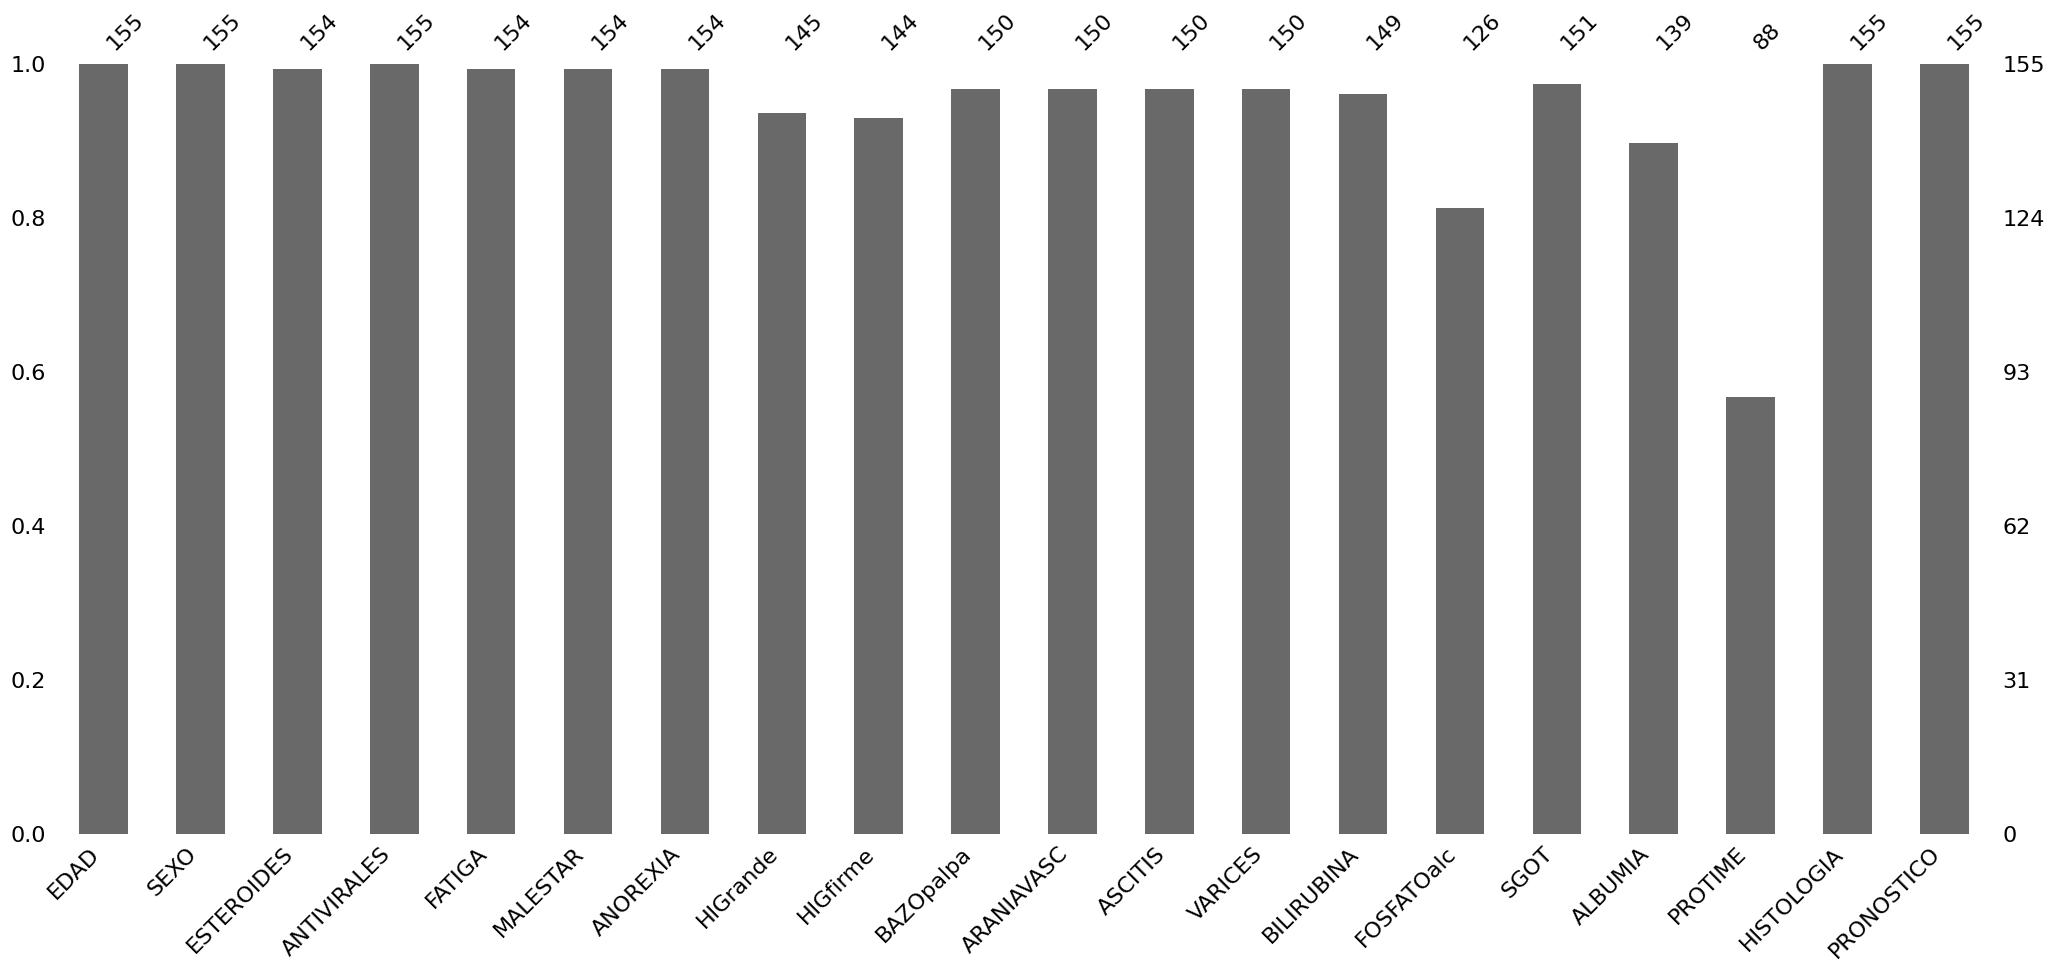

In [99]:
mi.bar(df)

<Axes: >

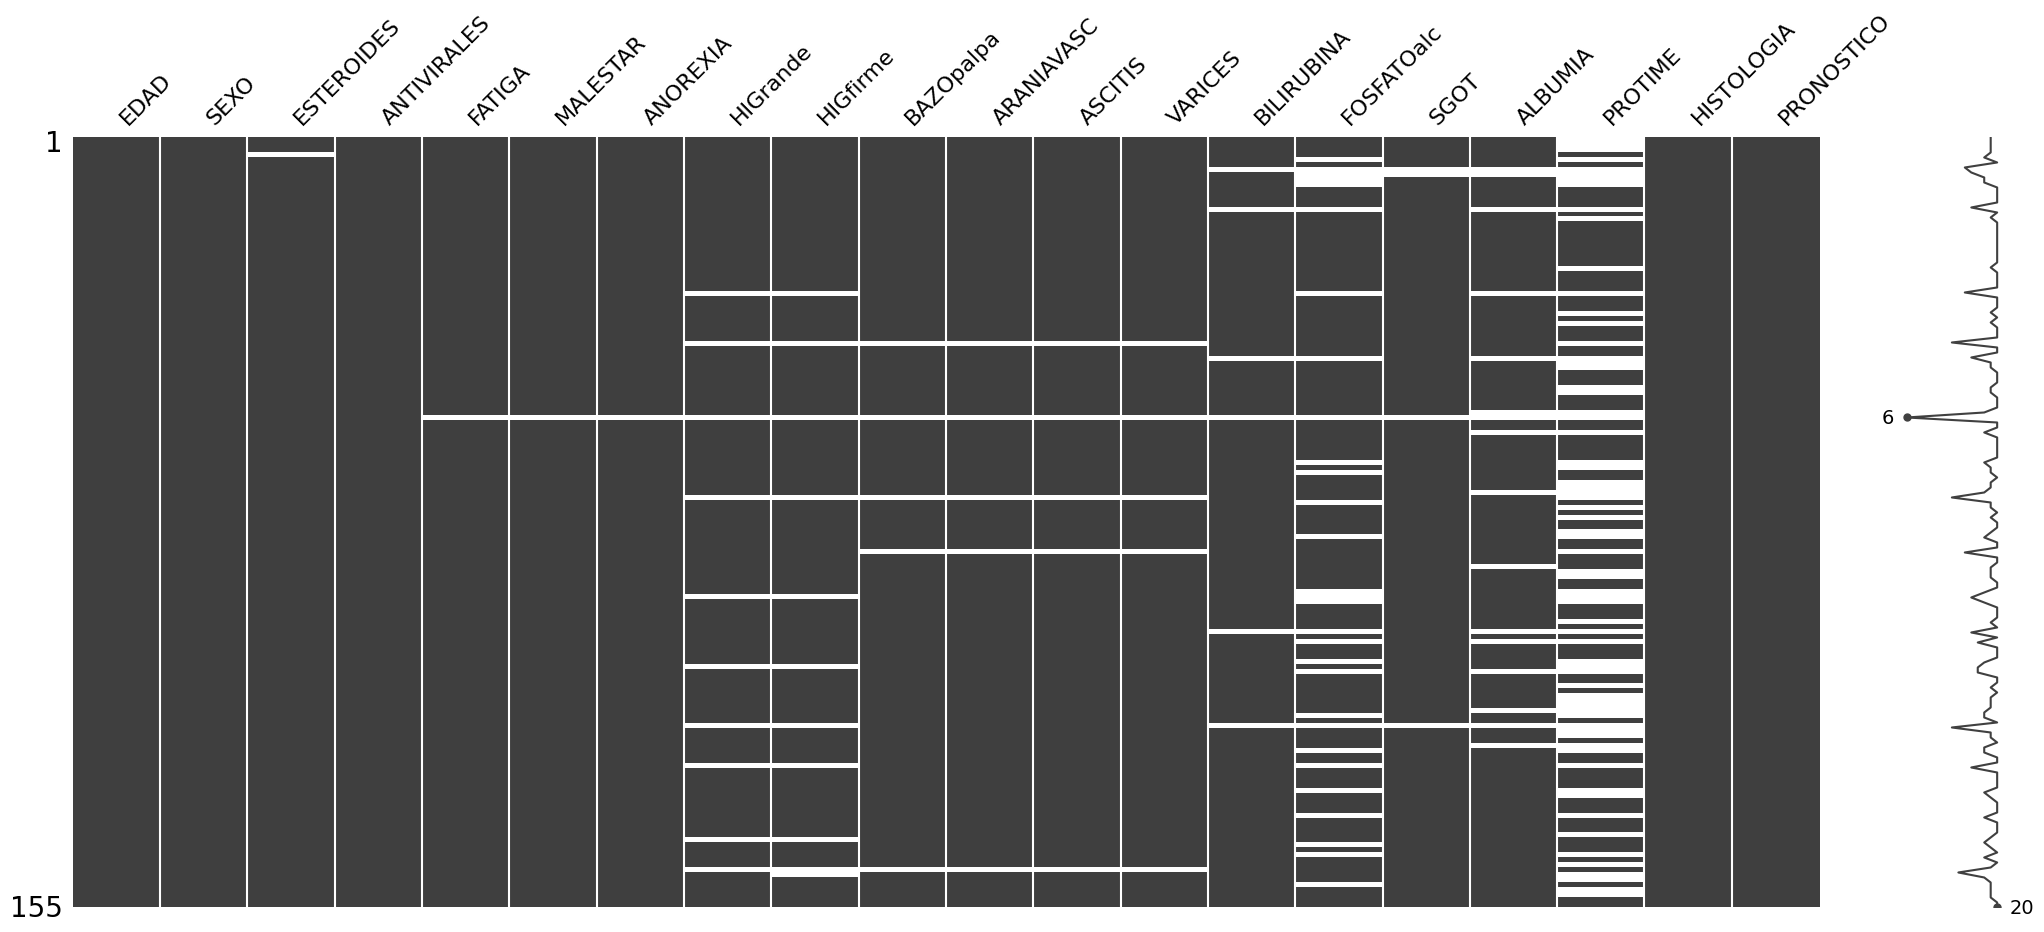

In [100]:
mi.matrix(df)

In [101]:
df.iloc[[56]]

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALESTAR,ANOREXIA,HIGrande,HIGfirme,BAZOpalpa,ARANIAVASC,ASCITIS,VARICES,BILIRUBINA,FOSFATOalc,SGOT,ALBUMIA,PROTIME,HISTOLOGIA,PRONOSTICO
56,34,FEMENINO,False,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,NaN,<NA>,False,VIVE


<Axes: >

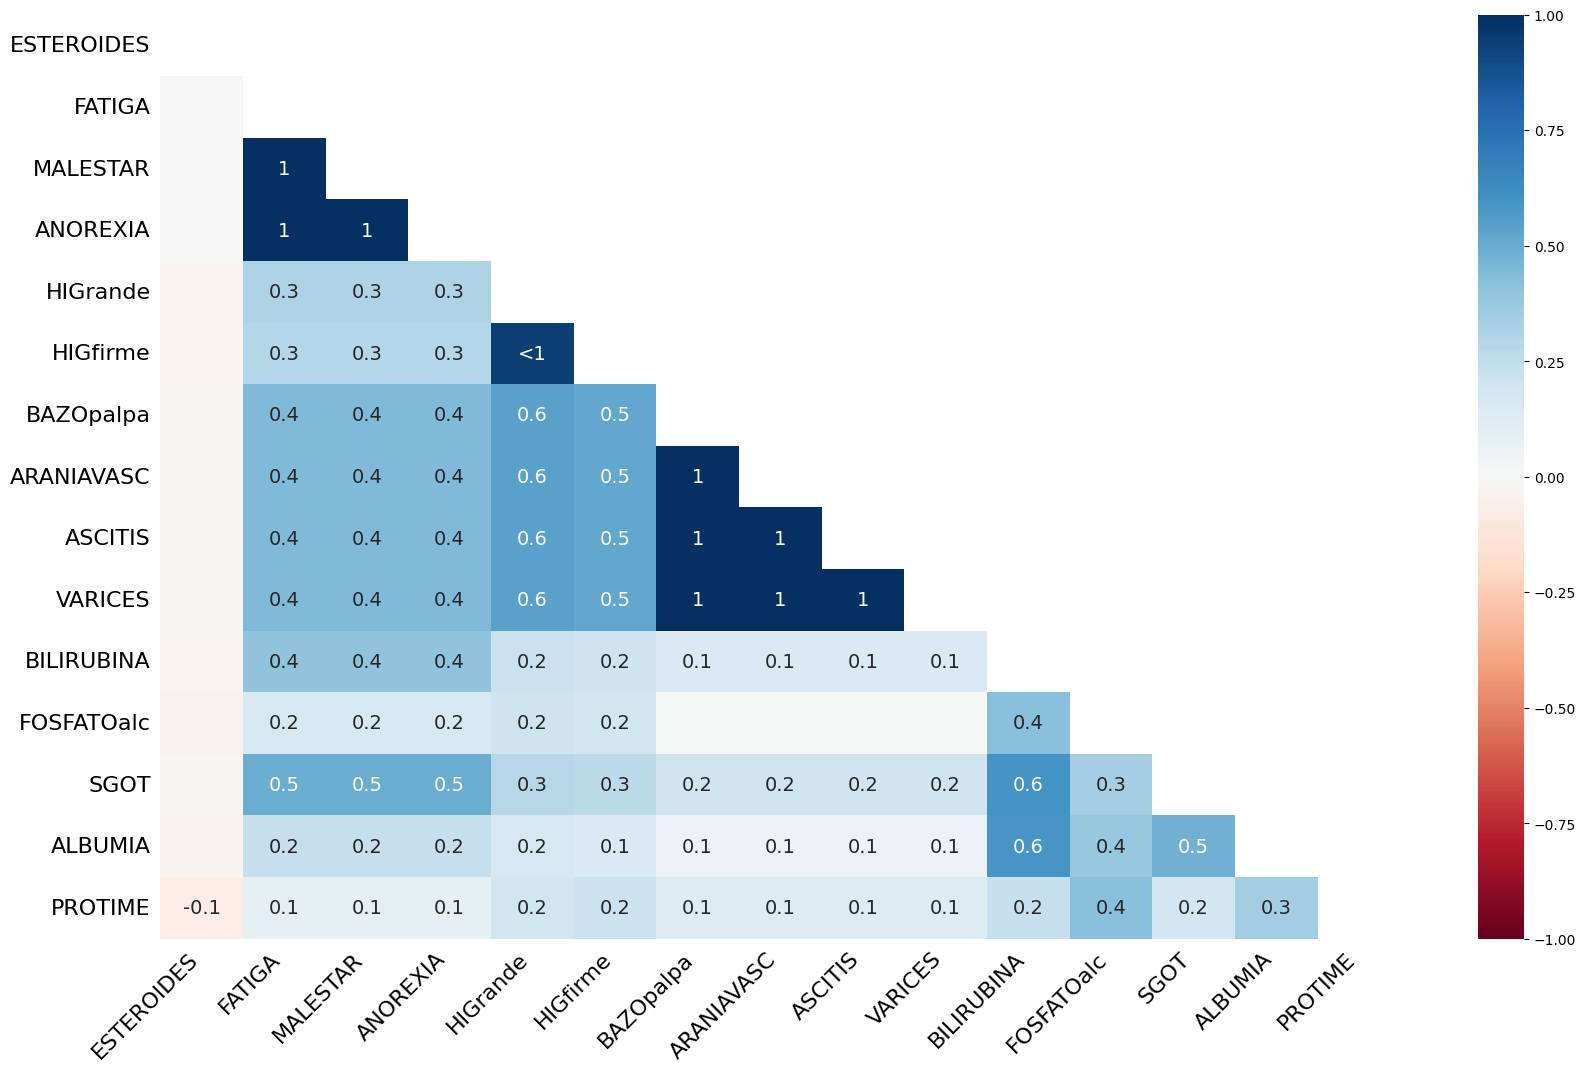

In [102]:
mi.heatmap(df)

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

Son las filas donde aparecen la mayoria de los valores nulos:

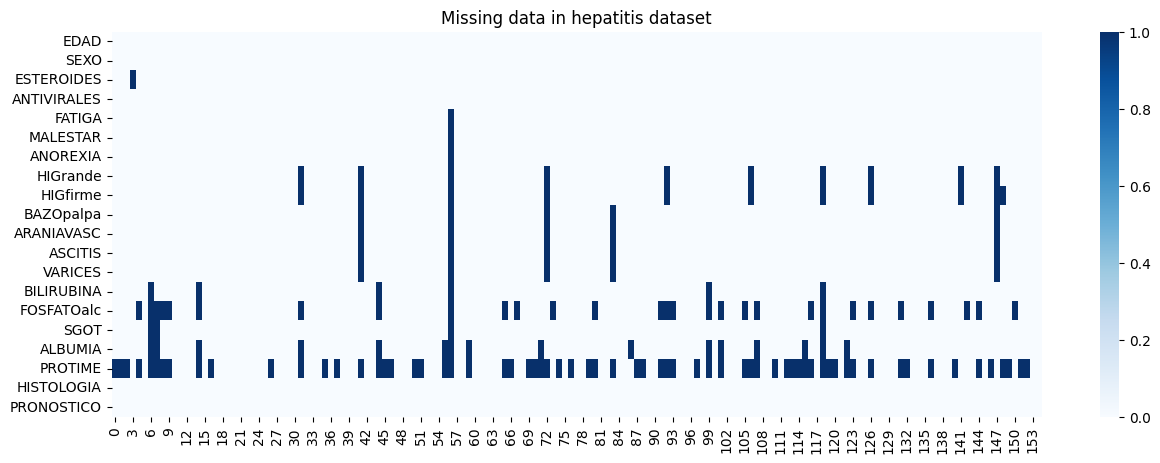

In [104]:
# Crear una figura y ejes utilizando plt.subplots()
fig, ax = plt.subplots(figsize=(15, 5))

# Crear el heatmap
sns.heatmap(df.isnull().transpose(), cmap='Blues', ax=ax)

# Corregir el título
ax.set_title('Missing data in hepatitis dataset')

# Mostrar el gráfico
plt.show()

Distantas opciones:

- Eliminar la columna la si tiene muchos valores ausentes
- Eliminarla la fila  si tiene muchos valores ausentes 
- Añadir valores a los datos que faltan


In [105]:
df_imp = df.copy()


Diferentes estrategias de imputación.

In [106]:
from sklearn.impute import SimpleImputer

En este caso la media

In [107]:
si = SimpleImputer(strategy = 'mean')
# Reshape para aplanarlo y en vez de en formato columna pasarlo como fila para poder pasar los valores
df_imp['BILIRUBINA'] = si.fit_transform(df_imp['BILIRUBINA'].values.reshape(-1,1))
print(df_imp['BILIRUBINA'][10:20])
print(df['BILIRUBINA'][10:20])


10    1.300000
11    1.000000
12    0.900000
13    2.200000
14    1.427517
15    2.000000
16    1.200000
17    0.600000
18    0.700000
19    0.700000
Name: BILIRUBINA, dtype: float64
10    1.3
11    1.0
12    0.9
13    2.2
14    NaN
15    2.0
16    1.2
17    0.6
18    0.7
19    0.7
Name: BILIRUBINA, dtype: float64


## Imputación  de datos

In [108]:
from sklearn.impute import SimpleImputer

df_imp = df.copy()
si = SimpleImputer(strategy="mean")


print(df_imp['BILIRUBINA'])
print(df_imp['BILIRUBINA'].values)
print(df_imp['BILIRUBINA'].values.reshape(-1,1))

df_imp['BILIRUBINA'] = si.fit_transform(df_imp['BILIRUBINA'].values.reshape(-1,1))
df_imp['ALBUMIA'] = si.fit_transform(df_imp['ALBUMIA'].values.reshape(-1,1))

0      1.0
1      0.9
2      0.7
3      0.7
4      1.0
      ... 
150    7.6
151    0.9
152    0.8
153    1.5
154    1.2
Name: BILIRUBINA, Length: 155, dtype: float64
[1.  0.9 0.7 0.7 1.  0.9 nan 1.  0.7 1.  1.3 1.  0.9 2.2 nan 2.  1.2 0.6
 0.7 0.7 0.9 1.2 1.  0.9 0.4 0.8 0.6 1.4 1.3 1.  2.3 1.  0.7 0.5 0.9 0.6
 1.3 2.3 1.  0.3 0.7 4.6 1.  0.7 nan 0.7 0.6 1.8 0.8 0.7 0.9 1.  0.6 1.2
 0.7 0.8 nan 0.7 1.  1.  0.7 0.7 3.5 0.7 0.8 0.8 0.7 4.1 1.  1.6 0.8 2.8
 0.9 1.  1.5 1.  2.  0.6 1.  0.7 0.8 0.7 0.7 1.5 1.3 1.6 0.9 2.5 1.2 0.6
 0.9 4.6 1.  1.5 1.5 0.6 0.8 3.  2.  nan 4.8 0.7 2.4 4.6 1.7 0.6 1.5 2.3
 1.  0.7 0.7 0.5 1.  1.2 1.1 3.2 1.  1.  nan 3.2 2.9 1.  1.5 0.9 1.  0.7
 1.  2.8 1.2 4.6 1.  8.  2.  1.  0.4 1.3 0.8 1.6 1.  1.3 1.7 3.9 1.  1.4
 1.9 1.2 4.2 1.7 0.9 0.6 7.6 0.9 0.8 1.5 1.2]
[[1. ]
 [0.9]
 [0.7]
 [0.7]
 [1. ]
 [0.9]
 [nan]
 [1. ]
 [0.7]
 [1. ]
 [1.3]
 [1. ]
 [0.9]
 [2.2]
 [nan]
 [2. ]
 [1.2]
 [0.6]
 [0.7]
 [0.7]
 [0.9]
 [1.2]
 [1. ]
 [0.9]
 [0.4]
 [0.8]
 [0.6]
 [1.4]
 [1.3]


In [109]:
null_values = df['BILIRUBINA'].isnull()
null_values

0      False
1      False
2      False
3      False
4      False
       ...  
150    False
151    False
152    False
153    False
154    False
Name: BILIRUBINA, Length: 155, dtype: bool

<Axes: xlabel='EDAD', ylabel='BILIRUBINA'>

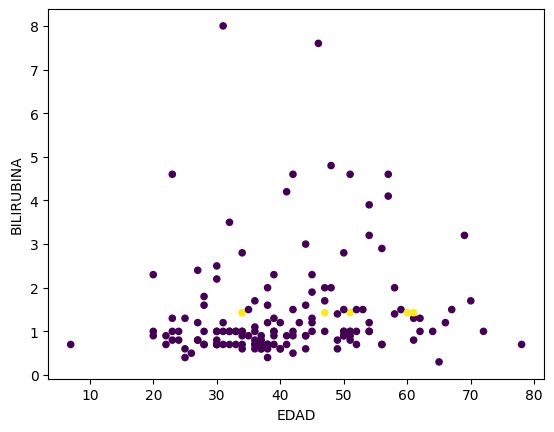

In [110]:
# Mostrar los valores nulos
df_imp.plot(x = 'EDAD', y = 'BILIRUBINA', kind='scatter', c=null_values)

<Axes: xlabel='EDAD', ylabel='BILIRUBINA'>

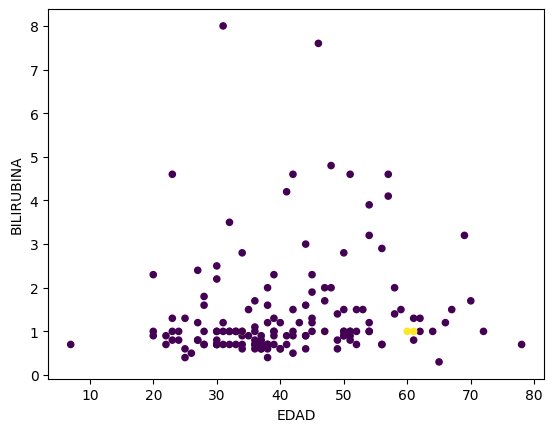

In [111]:
df_imp2 = df.copy()

si = SimpleImputer(strategy="median")

df_imp2['BILIRUBINA'] = si.fit_transform(df_imp2['BILIRUBINA'].values.reshape(-1,1))

df_imp2.plot(x = 'EDAD', y = 'BILIRUBINA', kind='scatter', c=null_values)

In [112]:
si = SimpleImputer(strategy="most_frequent", missing_values=pd.NA)
df_imp['SGOT'] = si.fit_transform(df_imp['SGOT'].values.reshape(-1,1))

### KNN

<Axes: xlabel='EDAD', ylabel='BILIRUBINA'>

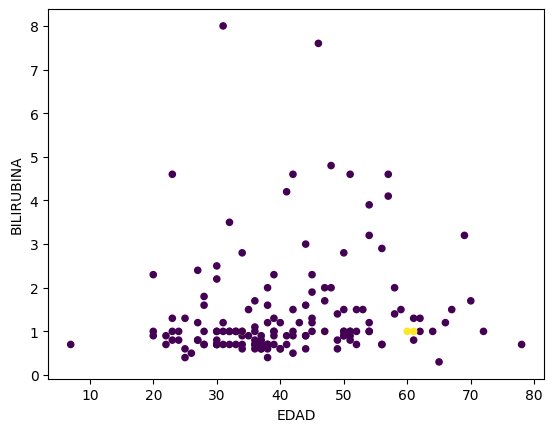

In [113]:
from sklearn.impute import KNNImputer

df_imp3 = df.copy()

knni = KNNImputer(n_neighbors=3, weights="uniform")


df_imp3['BILIRUBINA'] = si.fit_transform(df_imp3['BILIRUBINA'].values.reshape(-1,1))
df_imp3.plot(x = 'EDAD', y = 'BILIRUBINA', kind='scatter', c=null_values)

## MICE

In [115]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = df.filter(['BILIRUBINA', 'ALBUMIA'], axis=1).copy()
df_mice

,BILIRUBINA,ALBUMIA
0,1.0,4.0
1,0.9,3.5
2,0.7,4.0
3,0.7,4.0
4,1.0,4.0
...,...,...
150,7.6,3.3
151,0.9,4.3
152,0.8,4.1
153,1.5,4.1


In [117]:
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge())

mice_imputer.fit_transform(df_mice)

array([[1.        , 4.        ],
       [0.9       , 3.5       ],
       [0.7       , 4.        ],
       [0.7       , 4.        ],
       [1.        , 4.        ],
       [0.9       , 4.        ],
       [1.42751678, 3.81599787],
       [1.        , 3.89749304],
       [0.7       , 4.4       ],
       [1.        , 3.9       ],
       [1.3       , 4.4       ],
       [1.        , 3.7       ],
       [0.9       , 3.9       ],
       [2.2       , 4.9       ],
       [1.42751678, 3.81599787],
       [2.        , 2.9       ],
       [1.2       , 4.3       ],
       [0.6       , 4.        ],
       [0.7       , 4.1       ],
       [0.7       , 4.2       ],
       [0.9       , 4.2       ],
       [1.2       , 4.1       ],
       [1.        , 4.        ],
       [0.9       , 4.7       ],
       [0.4       , 4.3       ],
       [0.8       , 3.8       ],
       [0.6       , 3.7       ],
       [1.4       , 2.7       ],
       [1.3       , 3.8       ],
       [1.        , 4.6       ],
       [2.

## DATOS DESBALANCEADOS

In [119]:
df['PRONOSTICO'].value_counts()

PRONOSTICO
VIVE        123
FALLECIO     32
Name: count, dtype: int64

In [125]:
from sklearn.utils import resample

viven = df[df['PRONOSTICO'] == 'VIVE']
fallecen = df[df['PRONOSTICO'] == 'FALLECIO']

# Resampling con sustitucion, pueden ser repetidos
# Downsampling, se reduce la clase mayoritaria
viven_down = resample(viven, replace=True, n_samples=len(fallecen), random_state=1)

mi_df = pd.concat([viven_down, fallecen])

# Upsampling, se aumenta la clase minoritaria
fallecen_up = resample(fallecen, replace=True, n_samples=len(viven), random_state=1)

mi_df2 = pd.concat([viven, fallecen_up])

In [123]:
len(viven_down) == len(fallecen)

True

In [126]:
len(viven) == len(fallecen_up)

True

Podemos hacer lo mismo pero de forma automatica con SMOTE de la siguiente imbalanced-learn

In [127]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/257.7 kB 435.7 kB/s eta 0:00:01
   ------------------- -------------------- 122.9/257.7 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [130]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline

In [132]:
X = df.filter(['EDAD', 'SGOT', 'BILIRRUBINA'], axis=1).copy()
y = df.filter(['PRONOSTICO'], axis=1).copy()

In [136]:
smote = SMOTE()
smote_ppl = make_pipeline(SimpleImputer(), SMOTEENN(smote=smote))
A, b = smote_ppl.fit_resample(X, y)
A, b

(array([[ 51.        ,  85.89403974],
        [ 58.        , 242.        ],
        [ 44.        ,  55.        ],
        [ 30.        ,  64.        ],
        [ 47.        ,  23.        ],
        [ 48.        , 157.        ],
        [ 47.        ,  20.        ],
        [ 42.        ,  68.        ],
        [ 61.        ,  85.89403974],
        [ 56.        , 153.        ],
        [ 50.        ,  75.        ],
        [ 49.        ,  70.        ],
        [ 41.        , 120.        ],
        [ 46.        , 242.        ],
        [ 43.        ,  19.        ],
        [ 39.31579795, 208.57898977],
        [ 56.26077219,  79.61691681],
        [ 58.12286199,  83.04461648],
        [ 54.2341785 , 161.7658215 ],
        [ 40.39690186, 175.60309814],
        [ 56.72067721, 242.        ],
        [ 40.06322285, 128.29716905],
        [ 45.04098237,  21.04098237],
        [ 46.08255267, 160.42401308],
        [ 58.10485105,  83.02677904],
        [ 55.2451091 , 160.7548909 ],
        [ 43

In [137]:
b.value_counts()

PRONOSTICO
FALLECIO      68
VIVE          44
Name: count, dtype: int64

### NORMALIZACION

In [138]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(df_imp['BILIRUBINA'].values.reshape(-1,1))

array([[0.09090909],
       [0.07792208],
       [0.05194805],
       [0.05194805],
       [0.09090909],
       [0.07792208],
       [0.14643075],
       [0.09090909],
       [0.05194805],
       [0.09090909],
       [0.12987013],
       [0.09090909],
       [0.07792208],
       [0.24675325],
       [0.14643075],
       [0.22077922],
       [0.11688312],
       [0.03896104],
       [0.05194805],
       [0.05194805],
       [0.07792208],
       [0.11688312],
       [0.09090909],
       [0.07792208],
       [0.01298701],
       [0.06493506],
       [0.03896104],
       [0.14285714],
       [0.12987013],
       [0.09090909],
       [0.25974026],
       [0.09090909],
       [0.05194805],
       [0.02597403],
       [0.07792208],
       [0.03896104],
       [0.12987013],
       [0.25974026],
       [0.09090909],
       [0.        ],
       [0.05194805],
       [0.55844156],
       [0.09090909],
       [0.05194805],
       [0.14643075],
       [0.05194805],
       [0.03896104],
       [0.194

### Discretizacion

c:\Users\acull\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


(array([ 1.,  3., 21., 29., 37., 21., 24., 11.,  6.,  2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

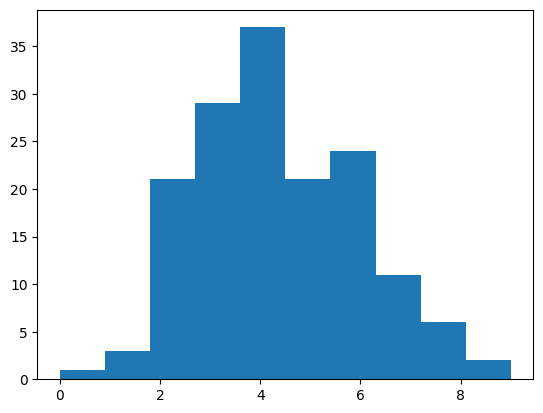

In [144]:
from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

datos = kbins.fit_transform(df_imp['EDAD'].values.reshape(-1,1))

import matplotlib.pyplot as plt

plt.hist(datos, bins=10)

## TEMA 2

In [145]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest #Selecciona las K=4 mejores caracteristicas
from sklearn.feature_selection import f_classif #Para clasificacion mediante ANOVA F-value
from sklearn.feature_selection import mutual_info_classif #Para clasificacion mediante informacion mutua

In [150]:
X, y = load_iris(return_X_y=True)

X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)
print('Tamaño X: {} - Tamaño X_new: {}'.format(X.shape, X_new.shape))

X_new2 = SelectKBest(mutual_info_classif, k=2).fit_transform(X, y)
print('Tamaño X: {} - Tamaño X_new: {} - Tamaño X_new: {}'.format(X.shape, X_new.shape, X_new2.shape))

Tamaño X: (150, 4) - Tamaño X_new: (150, 2)
Tamaño X: (150, 4) - Tamaño X_new: (150, 2) - Tamaño X_new: (150, 2)


In [153]:
from sklearn.model_selection import train_test_split
import numpy as np

# Crear ruido o error
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

# Añadir ruido a las características
X = np.hstack((X, E))

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

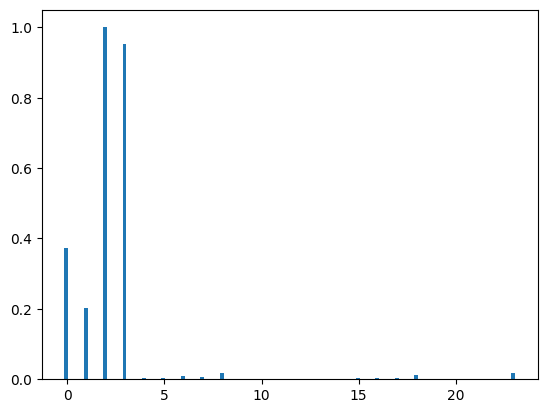

In [157]:
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)

# Les hacemnos el logaritmo negativo para que los valores sean mas faciles de interpretar
scores = -np.log10(selector.pvalues_)

# Normalizamos los valores para que sean mas faciles de interpretar
scores /= scores.max()

X_indices = np.arange(X.shape[-1])

# Vamos a ver las 4 clases mejores resaltadas
plot = plt.bar(X_indices - 0.05, scores, width=.2)